In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('task_3_dataset.csv')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [8]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
cat_col=df.select_dtypes(include=['object']).columns
# drop target variable
cat_col=cat_col.drop('y')
df1=df[cat_col]
df1

,job,marital,education,default,housing,loan,contact,month,poutcome
0,unemployed,married,primary,no,no,no,cellular,oct,unknown
1,services,married,secondary,no,yes,yes,cellular,may,failure
2,management,single,tertiary,no,yes,no,cellular,apr,failure
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown
4518,technician,married,secondary,no,no,no,cellular,aug,unknown
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other


In [10]:
# using OneHotEncorder for categorical variable
en=OneHotEncoder(drop='first',sparse_output=False)
en_data=en.fit_transform(df1)

In [11]:
num_col=df.select_dtypes(include=np.number).columns
df2=df[num_col]
df2

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [12]:
# using Scaler for numerical variable
sc=StandardScaler()
sc_data=sc.fit_transform(df2)

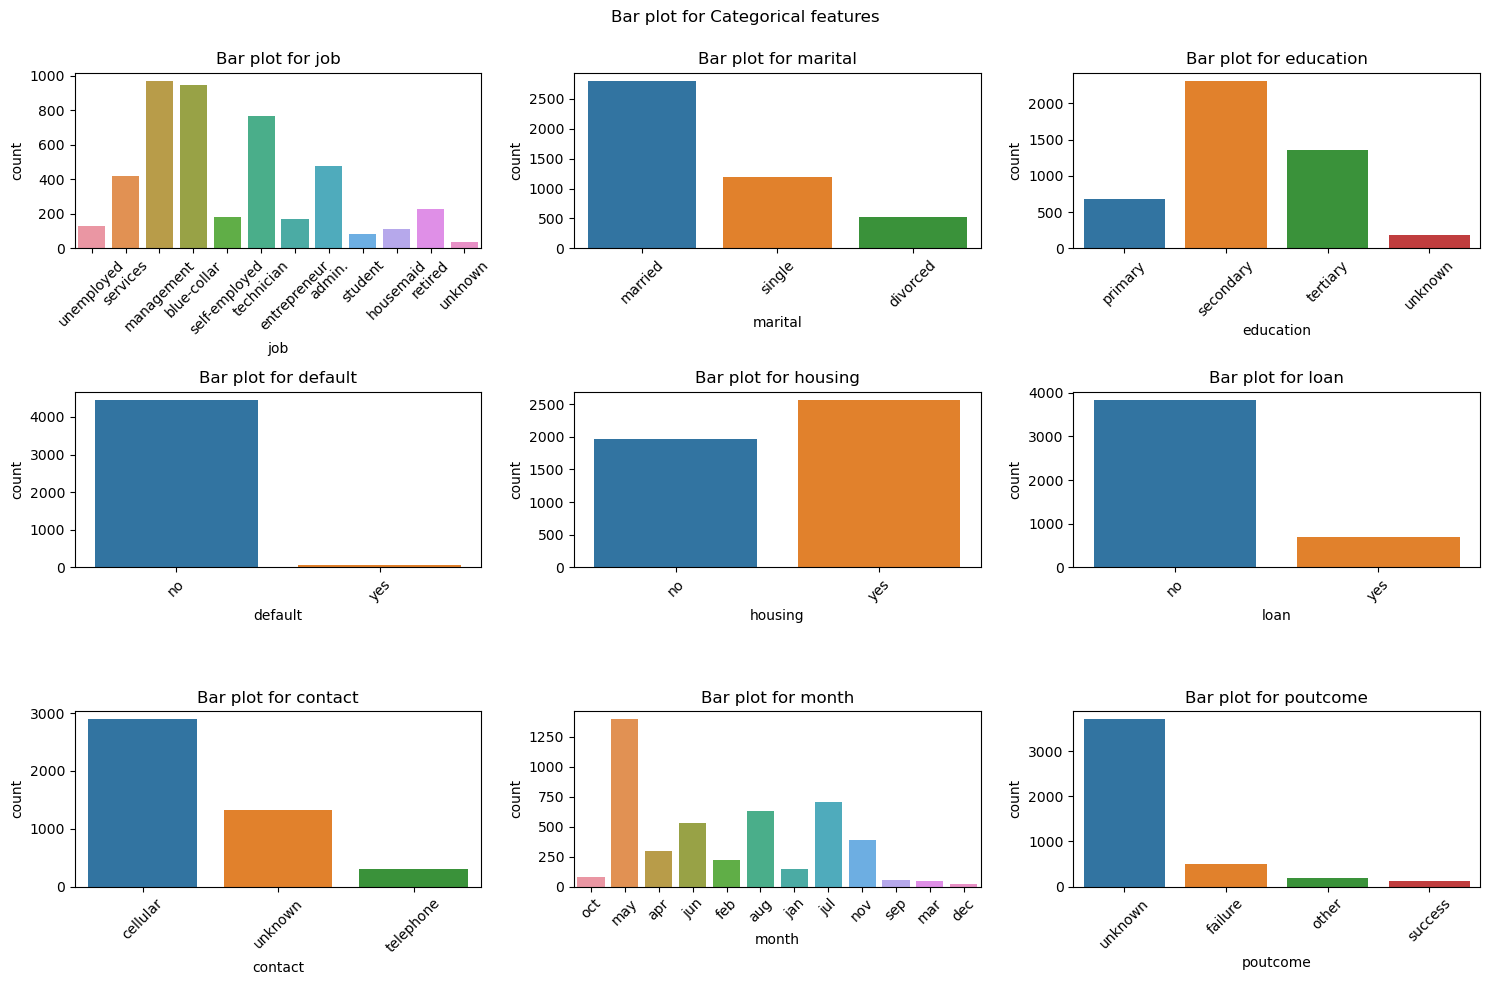

In [20]:
# categorical variable distribution
plt.figure(figsize=(15,10))
for i,col in enumerate(cat_col,1):
    plt.subplot(3,3,i)
    sns.countplot(x=col,data=df)
    plt.title(f"Bar plot for {col}")
    plt.xticks(rotation=45)
plt.suptitle("Bar plot for Categorical features\n")
plt.tight_layout()
plt.show()

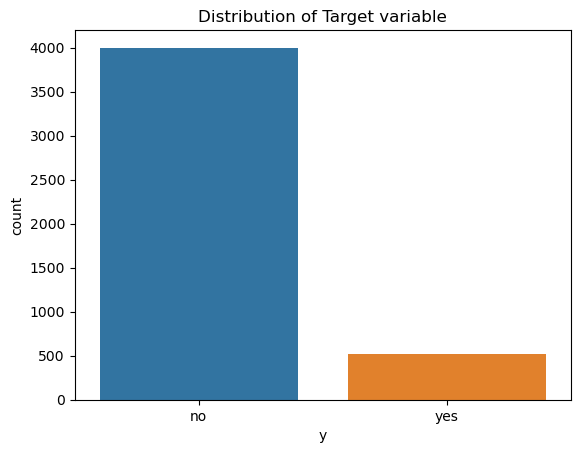

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# target variable distribution
sns.countplot(x='y',data=df)
plt.title("Distribution of Target variable")
plt.show()

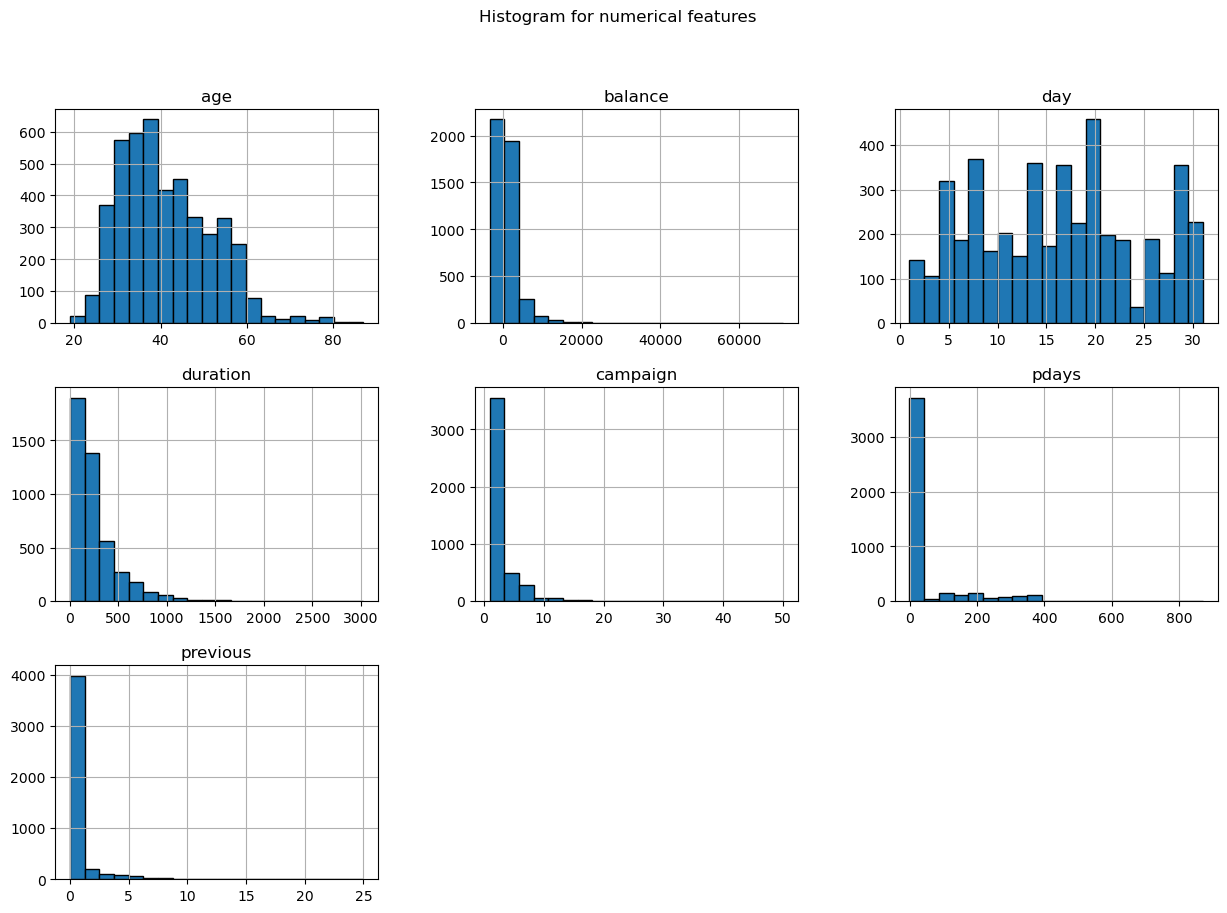

In [15]:
# numerical variable distribution
df[num_col].hist(figsize=(15,10),bins=20,edgecolor='k')
plt.suptitle("Histogram for numerical features")
plt.show()

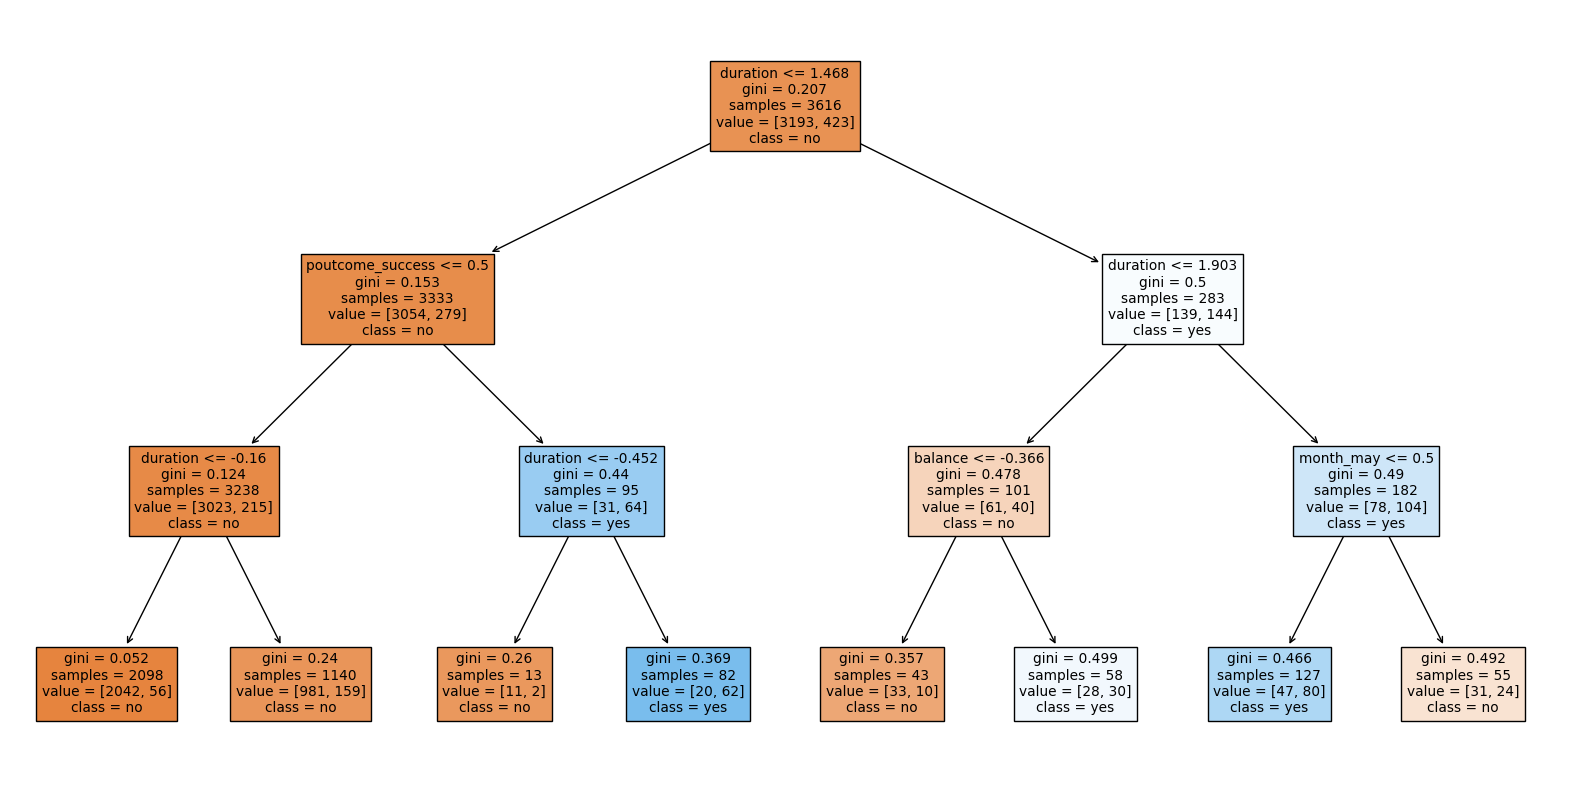

In [21]:
# Visualize the Pruned Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=list(num_col) + en.get_feature_names_out(cat_col).tolist(), class_names=['no', 'yes'])
plt.show()

In [16]:
# combine encoded categorical and scaled numerical features
X=np.hstack((sc_data,en_data))
y=df['y'].apply(lambda x: 1 if x=='yes' else 0)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
# split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)
# Build and prune the Decision Tree Classifier
clf=DecisionTreeClassifier(random_state=42,max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# evaluate the pruned model
y_pred=clf.predict(X_test)
print(f"Accuracy score : {accuracy_score(y_test,y_pred)}")
print(f"Precision score : {precision_score(y_test,y_pred)}")
print(f"Recall score : {recall_score(y_test,y_pred)}")
print(f"F1 score : {f1_score(y_test,y_pred)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test,y_pred)}")

Accuracy score : 0.8939226519337017
Precision score : 0.515625
Recall score : 0.336734693877551
F1 score : 0.4074074074074074
Confusion matrix:
[[776  31]
 [ 65  33]]
